In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

%matplotlib

COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

Using matplotlib backend: TkAgg


In [6]:
def filterTempSignal(temperature, kernel = 101):
    return medfilt(temperature, kernel_size = kernel)

def saveFig(fig, name, dpi = 300):
    fig.savefig(name, dpi = dpi)
    
def readCalibrationData(file_name):
    cal = np.genfromtxt(file_name, usecols = range(2), skip_header = 5, delimiter = "\t")
    with open(file_name) as file:
        file.readline()
        line = file.readline().split(" ")[3]
    return line, cal

def getCalibrationData(file_name, temperature_start_time):
    return uniformTime(temperature_start_time, *readCalibrationData(file_name))

def addSecondsToCalibration(time, calibration):
    calibration = calibration.copy()
    calibration[:, 0] = calibration[:, 0] + time
    return calibration

def uniformTime(t_start_time, start_time, calibration):
    ts_h, ts_m = t_start_time.split(":")
    s_h, s_m = start_time.split(":")
    ts = int(ts_h) * 60 + int(ts_m)
    s = int(s_h) * 60 + int(s_m)
    return addSecondsToCalibration((s - ts) * 60, calibration)

def plotTemperatureAndPower(temperature_time, temperature, calibrations):
    fig, ax1 = plt.subplots(1, figsize=(8, 4.5))

    ax2 = ax1.twinx()

    ax1.plot(temperature_time, temperature, c = COLORS[0])
    ax1.set_ylabel('Temperature ($^\circ$C)', color = COLORS[0])
    ax1.tick_params('y', colors = COLORS[0])
    
    t = type(calibrations)
    if (t is list) or (t is tuple):
        for i in range(len(calibrations)):
            ax2.plot(calibrations[i][:, 0] / 3600, calibrations[i][:, 1], c = COLORS[1])
    else:
        ax2.plot(calibrations[:, 0] / 3600, calibrations[:, 2], c = COLORS[1])

    ax2.set_ylabel('Power ($\mu$W)', color = COLORS[1])
    ax2.tick_params('y', colors = COLORS[1])

    ax1.set_xlabel('Time (hours)')

    plt.show()
    
    return fig

def getTemperatures(file_name):
    T = np.genfromtxt(file_name, usecols = range(6), skip_header = 1, delimiter = ',')
    t = T[:, 0] / 3600
    T_bath = filterTempSignal(T[:, 1])
    T_ebath = filterTempSignal(T[:, 3])
    T_ambient = filterTempSignal(T[:, 5])
    return t, T_bath, T_ebath, T_ambient

In [17]:
t, T_bath, T_ebath, T_ambient = getTemperatures("01-02/Temperatures00-01.csv")

In [18]:
cal00 = getCalibrationData("01-02/JBCAL00.ASC", "11:20")
cal01 = getCalibrationData("01-02/JBCAL01.ASC", "11:20")

In [19]:
fig = plotTemperatureAndPower(t, T_bath, (cal00, cal01))
saveFig(fig, "01-02/Cal00-01.png")

In [10]:
t, T_bath, T_ebath, T_ambient = getTemperatures("02-03/Temperatures-02-04.csv")

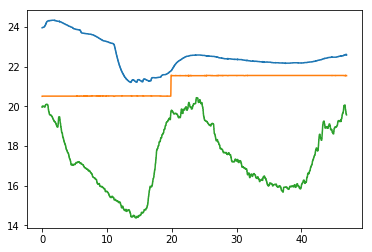

In [11]:
plt.plot(t, T_bath, label = "Baño")
plt.plot(t, T_ebath, label = "Externo")
plt.plot(t, T_ambient, label = "Ambiente")

In [12]:
cal02 = getCalibrationData("02-03/JBSCAL02.ASC", "11:20")
cal03 = getCalibrationData("02-03/JBSCAL03.ASC", "11:20")
cal04 = getCalibrationData("02-03/JBSCAL04.ASC", "11:20")

cal04[:, 0] = cal04[:, 0] + 24 * 60 * 60

In [15]:
fig = plotTemperatureAndPower(t, T_bath, (cal02, cal03, cal04))
saveFig(fig, "02-03/Calibrations.png")